## Project:-Corona-Virus-Sentiment-Analysis

in this project we are used tweeter dataset (tweets about corona virus) dataset 

### Aim - Sentiment analysis- predicting weather the tweet is Positive or Negative 

Loading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Corona_NLP_train.csv')

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

<AxesSubplot:>

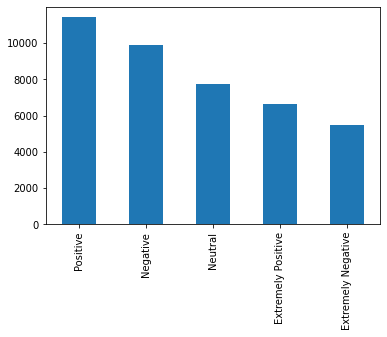

In [6]:
df.Sentiment.value_counts().plot(kind='bar')

#### Converting Sentiment column object into float or int

In [7]:
def encoding(sentiment):
    if sentiment=='Positive':
        return 2
    elif sentiment=='Extremely Positive':
        return 2
    elif sentiment=='Negative':
        return 0
    elif sentiment=='Extremely Negative':
        return 0
    else:
        return 1

In [8]:
df['Sentiment']=df['Sentiment'].apply(encoding)

In [9]:
df['Sentiment'].value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

#### Some Data Visualization

In [10]:
location=df['Location'].value_counts()[:15].reset_index()
location

,index,Location
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


<AxesSubplot:xlabel='index', ylabel='Location'>

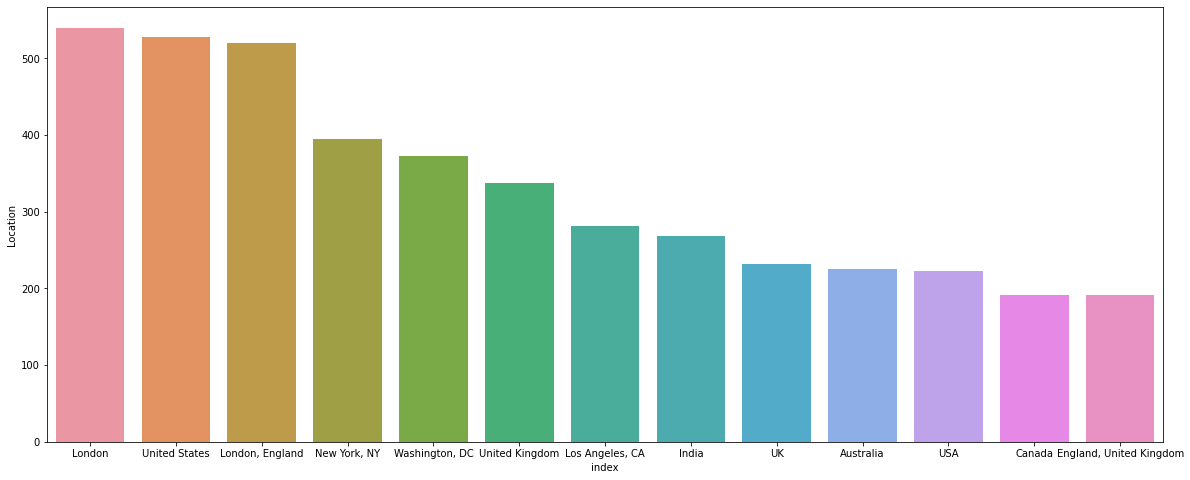

In [11]:
plt.figure(figsize=(20,8))
sns.barplot(x='index',y='Location',data=location[:13])


## Text Pre-Proccessing

1.Removing Punctuations

2.Removing Hyperlinks and unnecessary text

3.Removing Stopwords

4.Vectorization

5.TF-IDF and BOW

In [12]:
import nltk
from nltk.corpus import stopwords
import re

In [6]:
# text4

In [22]:
import re

Replacing Hyperlinks and punctuation from the dataset

In [25]:
df['OriginalTweet']=df['OriginalTweet'].str.replace(r'http\S+', "")
df['OriginalTweet']=df['OriginalTweet'].str.replace(r"#\S+", "")
df['OriginalTweet']=df['OriginalTweet'].str.replace(r"@\S+", "")
df['OriginalTweet']=df['OriginalTweet'].str.replace("\r", "")
df['OriginalTweet']=df['OriginalTweet'].str.replace("\n", "")
df['OriginalTweet']=df['OriginalTweet'].str.replace(r"[^\w\s]", "")
df['OriginalTweet']=df['OriginalTweet'].str.lower()

<ipython-input-25-43454f3f7a59>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OriginalTweet']=df['OriginalTweet'].str.replace(r'http\S+', "")
<ipython-input-25-43454f3f7a59>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OriginalTweet']=df['OriginalTweet'].str.replace(r"#\S+", "")
<ipython-input-25-43454f3f7a59>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OriginalTweet']=df['OriginalTweet'].str.replace(r"@\S+", "")
<ipython-input-25-43454f3f7a59>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['OriginalTweet']=df['OriginalTweet'].str.replace(r"[^\w\s]", "")


In [4]:
# df['OriginalTweet']

In [27]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,1
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,2
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,2
4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the outb...,0


In [28]:
X_train = df['OriginalTweet'].str.replace(r'http\S+', "")
X_train = X_train.str.replace(r"#\S+", "")
X_train = X_train.str.replace(r"@\S+", "")
X_train = X_train.str.replace("\r", "")
X_train = X_train.str.replace("\n", "")
X_train = X_train.str.replace(r"[^\w\s]", "")
X_train = X_train.str.lower()

<ipython-input-28-36ca88674ab8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = df['OriginalTweet'].str.replace(r'http\S+', "")
<ipython-input-28-36ca88674ab8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace(r"#\S+", "")
<ipython-input-28-36ca88674ab8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace(r"@\S+", "")
<ipython-input-28-36ca88674ab8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace(r"[^\w\s]", "")


In [29]:
X_train

0                                                and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the  outb...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know its getting tough when   is rationing...
41155    is it wrong that the smell of hand sanitizer i...
41156     well newused rift s are going for 70000 on am...
Name: OriginalTweet, Length: 41157, dtype: object

creating a Function which can removes stopwords and punctuations

In [30]:
def text_process(text):
    nopunc=[tweet for tweet in text if text not in string.punctuation]
    
    nopunc=''.join(nopunc)
    
    return [mess for mess in nopunc.split() if mess.lower() not in stopwords.words('english')]

just for testing our function

In [31]:
df['OriginalTweet'][:5].apply(text_process)

0                                                   []
1    [advice, talk, neighbours, family, exchange, p...
2    [coronavirus, australia, woolworths, give, eld...
3    [food, stock, one, emptyplease, dont, panic, e...
4    [ready, go, supermarket, outbreaknot, im, para...
Name: OriginalTweet, dtype: object

### Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(df['OriginalTweet'])

In [37]:
print(len(bow_transformer.vocabulary_))

45087


In [35]:
tweet_bow = bow_transformer.transform(df['OriginalTweet'])

In [36]:
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (41157, 45087)
Amount of Non-Zero occurences:  632319


### TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfidf=TfidfTransformer().fit(tweet_bow)
tfidf_tweet=tfidf.transform(tweet_bow)

In [44]:
print(tfidf_tweet)

  (1, 39603)	0.162548708435
  (1, 39138)	0.12229115203739169
  (1, 36320)	0.08749495148497007
  (1, 35930)	0.14654122976304326
  (1, 35393)	0.1716128585510132
  (1, 33260)	0.16705761063862173
  (1, 30946)	0.25842323026070724
  (1, 30261)	0.3274600367663789
  (1, 28601)	0.1283924268581971
  (1, 28389)	0.08880765349299488
  (1, 27872)	0.34566897082280634
  (1, 27176)	0.3909093232287527
  (1, 25366)	0.20272787904734568
  (1, 23821)	0.14158364363214251
  (1, 18206)	0.21732772104019876
  (1, 15702)	0.13195915375885828
  (1, 15250)	0.2003112112622843
  (1, 14488)	0.2095097984093741
  (1, 10981)	0.16806802626558873
  (1, 10098)	0.14496219812671032
  (1, 8631)	0.20737370092696392
  (1, 3207)	0.14935776672544382
  (1, 3081)	0.20109063019445056
  (1, 2898)	0.1914020141176961
  (2, 44291)	0.4402884089837706
  :	:
  (41156, 43899)	0.28426355581831625
  (41156, 43737)	0.12919365341373254
  (41156, 43164)	0.24821598792388957
  (41156, 42503)	0.19218861472029125
  (41156, 36680)	0.13414931836158475
 

## Model Training

#### Multinomial NB Classifier

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
model=MultinomialNB().fit(tfidf_tweet,df['Sentiment'])


In [53]:
all_predictions=model.predict(tfidf_tweet)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(all_predictions)

[2 2 2 ... 2 2 0]


#### model evaluation

In [58]:
print(classification_report(df['Sentiment'], all_predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     15398
           1       0.98      0.09      0.16      7713
           2       0.67      0.96      0.79     18046

    accuracy                           0.73     41157
   macro avg       0.83      0.61      0.59     41157
weighted avg       0.79      0.73      0.68     41157



### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=df['OriginalTweet']
y=df['Sentiment']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
X_train

7178     market update the government has limited custo...
32341    louisiana insurance commissioner jim donelon a...
22374    the public is panic grocery shopping due to th...
27101    this is just so anticonsumer  earlyboarding fe...
30997    former deputy finance minister fadhil nabi eco...
                               ...                        
12363      representatives from helped deliver products...
5695     suggests have necessary medications amp medica...
8006     if anyones making cash by selling medicines bo...
17745    my general practitioner told me the same no pr...
17931    are you getting weird text message or calls re...
Name: OriginalTweet, Length: 28809, dtype: object

### Building Pipeline

In [59]:
from sklearn.pipeline import Pipeline

In [66]:
pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [67]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002A08A48B280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
predictions=pipeline.predict(X_test)
print(predictions)

[2 2 2 ... 0 0 0]


In [70]:
y_test

27922    1
8736     2
27033    1
19818    0
2948     2
        ..
33824    2
18618    0
17030    1
33941    1
18324    0
Name: Sentiment, Length: 12348, dtype: int64

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      4635
           1       0.90      0.02      0.03      2267
           2       0.60      0.91      0.72      5446

    accuracy                           0.65     12348
   macro avg       0.75      0.53      0.48     12348
weighted avg       0.71      0.65      0.59     12348

